<a href="https://colab.research.google.com/github/lizsantacruz/retail-sales-analysis-/blob/main/retail_sales_parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto I - Parte 4/retail_sales_dataset.csv')

In [26]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [27]:
#Verifico si exiten valores nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [30]:
#verifico valores duplicados
filas_duplicadas = df[df.duplicated()].sum()
filas_duplicadas

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [29]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


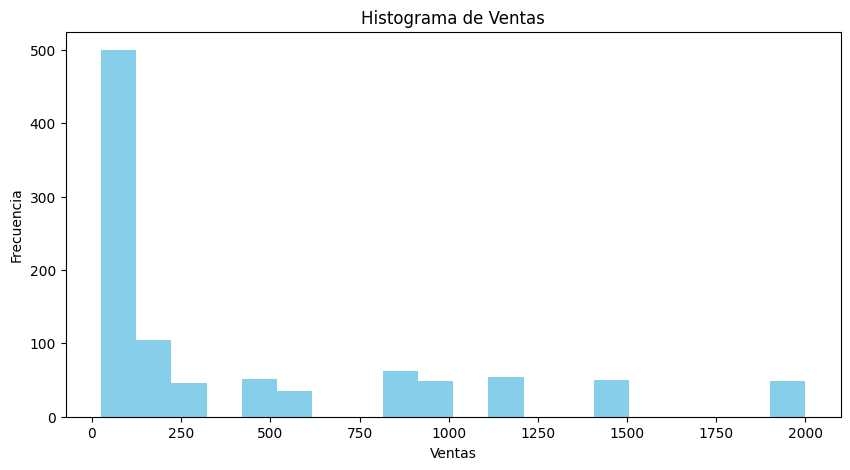

In [33]:
#Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
plt.figure(figsize=(10, 5))
plt.hist(df['Total Amount'], bins=20, color='skyblue')
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.title("Histograma de Ventas")
plt.show()

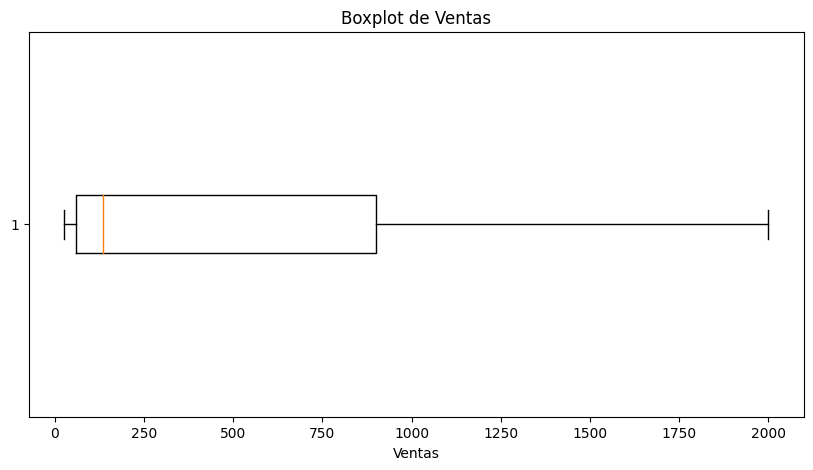

In [32]:
#Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
plt.figure(figsize=(10, 5))
plt.boxplot(df['Total Amount'], vert=False)
plt.xlabel("Ventas")
plt.title("Boxplot de Ventas")
plt.show()

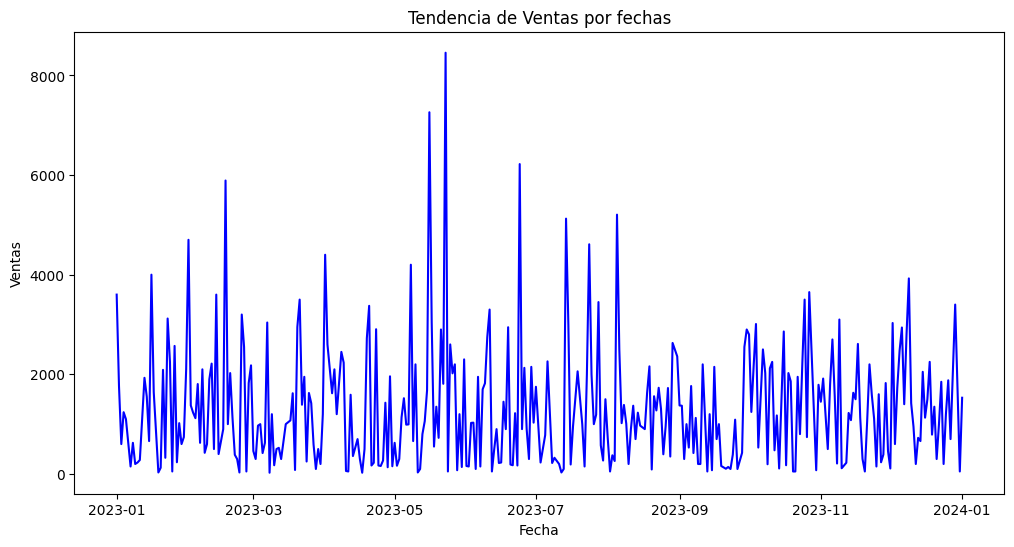

In [37]:
#cambio Date a formato fecha
df['Date'] = pd.to_datetime(df['Date'])

# Agrupacion por fecha y calculo de suma de ventas diarias
ventas_por_dia = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(ventas_por_dia.index, ventas_por_dia.values, color='blue')
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Tendencia de Ventas por fechas")
plt.show()

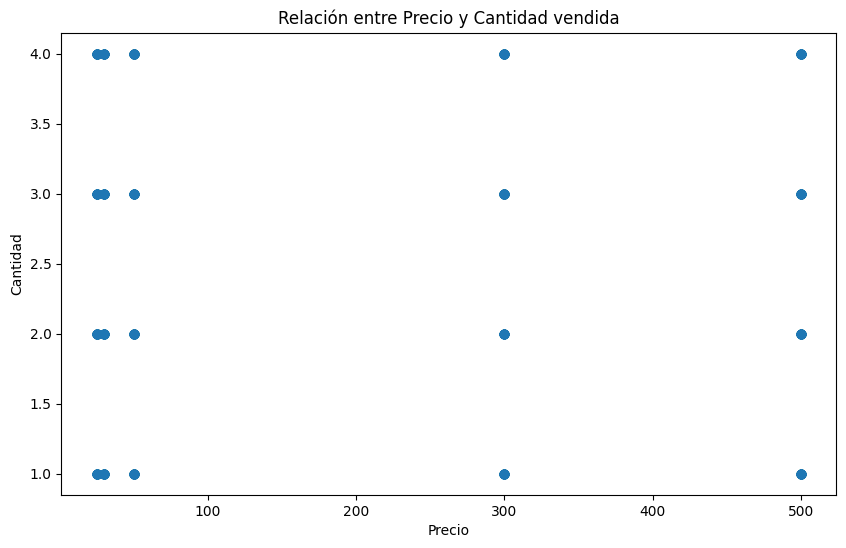

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price per Unit'], df['Quantity'], alpha=0.5)
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Relación entre Precio y Cantidad vendida")
plt.show()

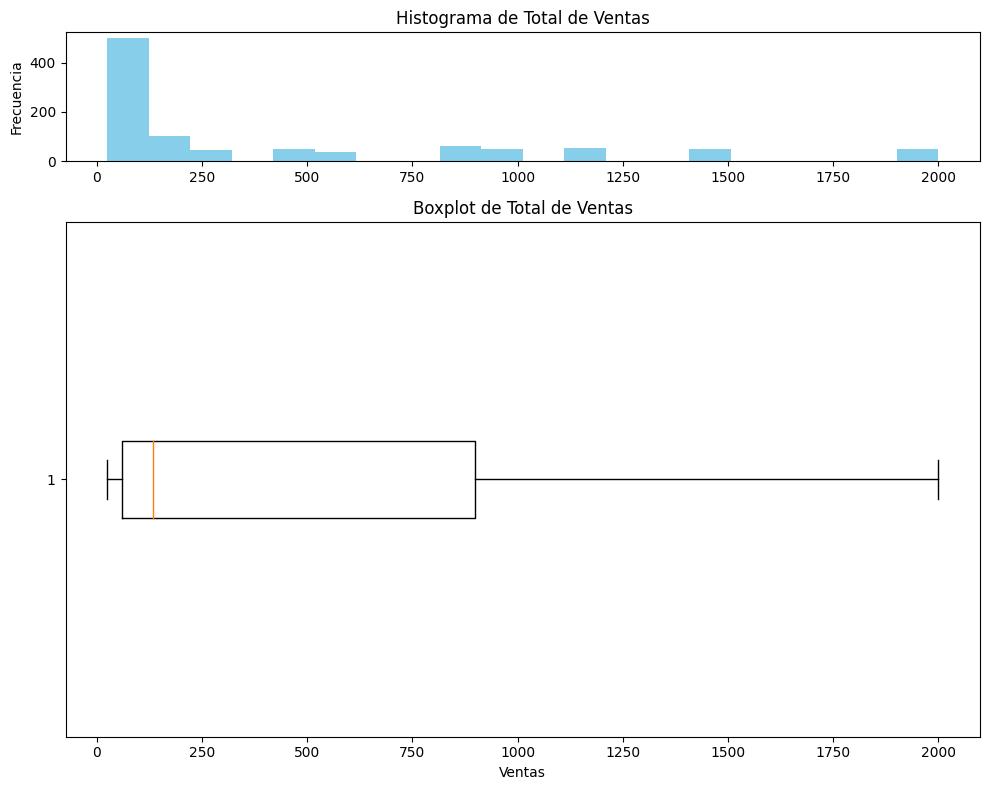

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})


ax[0].hist(df['Total Amount'], bins=20, color='skyblue')
ax[0].set_title("Histograma de Total de Ventas")
ax[0].set_ylabel("Frecuencia")

ax[1].boxplot(df['Total Amount'], vert=False)
ax[1].set_title("Boxplot de Total de Ventas")
ax[1].set_xlabel("Ventas")

plt.tight_layout()
plt.show()